In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Recargar el archivo
file_path = "housing.csv"
df = pd.read_csv(file_path)

target = 'median_house_value'


### Crea una regresión lineal con cross validation

In [2]:
# Dummies y NAS
df = pd.get_dummies(df)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [3]:
# Define X, y
X = df.copy()
X = X.drop(columns=[target])
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal = model.predict(X_test)
r2_score(y_pred=predicciones_lineal, y_true=y_test)

0.639578538052374

In [4]:
## Crea una función de calibracion
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q = bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    plt.plot(grouped.predicciones, grouped.y, marker='o', label = 'Modelo', color = 'blue')
    plt.plot(grouped.predicciones, grouped.predicciones, marker='o', label = 'Real', color = 'red')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.legend()
    plt.grid()

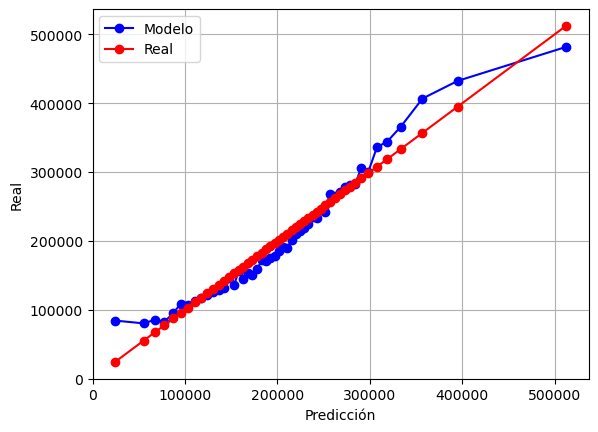

In [5]:
calibracion(predicciones_lineal, y_test, 50)

### Standard escaler

Escalar valor a media 0 y varianza 1


$Z = \frac{x - \mu}{\sigma}$


In [6]:
from sklearn.preprocessing import StandardScaler
X_prueba = df[['total_rooms', 'median_income']]
X_prueba_escalada = StandardScaler().fit_transform(X_prueba)

In [7]:
X_prueba_escalada

array([[-0.8048191 ,  2.34476576],
       [ 2.0458901 ,  2.33223796],
       [-0.53574589,  1.7826994 ],
       ...,
       [-0.17499526, -1.14259331],
       [-0.35559977, -1.05458292],
       [ 0.06840827, -0.78012947]])

### Polinomio grado 2 y escalamiento

In [8]:

degree = 2

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_2 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_2, y_true=y_test)

0.6855523416341065

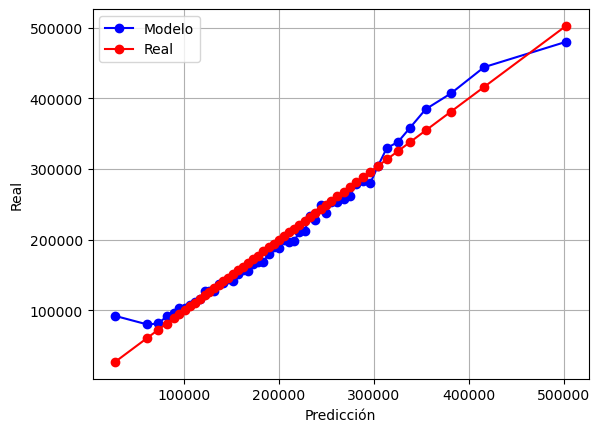

In [9]:
calibracion(predicciones_poly_2, y_test, 50)

#### Polinomio grado 3

In [10]:
degree = 3

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_3 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_3, y_true=y_test)

0.7262781624521403

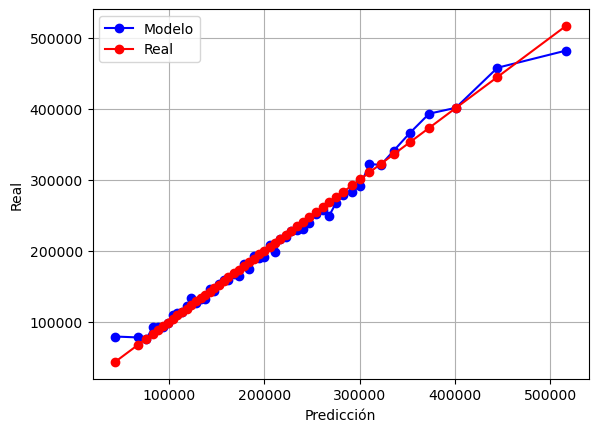

In [11]:
calibracion(predicciones_poly_3, y_test, 50)

### Feature engenieering 

Per room
* Population per room
* Bedrooms per room

Per household
* Population per household
* Rooms per household
* Bedrooms per household

Per population
* Income per person
* Rooms per person

Transformaciones
* Logaritmo ingreso
* Raíz de total rooms 
* Median income **2 

In [12]:
# Per room
df['population_per_room'] = df['population'] / df['total_rooms']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Per household
df['population_per_household'] = df['population'] / df['households']
df['total_rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']

# Per population
df['median_income_per_person'] = df['median_income'] / df['population']
df['total_rooms_per_person'] = df['total_rooms'] / df['population']

# Transformaciones
df['log_median_income'] = np.log(df['median_income'])
df['sqrt_total_rooms'] = np.sqrt(df['total_rooms'])
df['median_income_2'] = df['median_income'] ** 2


In [13]:
# Correlación 


In [14]:
# Define los valores numericos
numerical_features = [i for i in df.keys() if 'ocean_proximity' not in i and i != 'median_house_income']

### Realiza un bivariado de las variables numericas

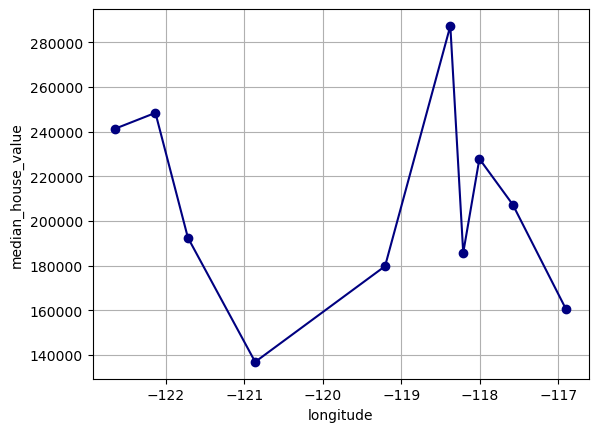

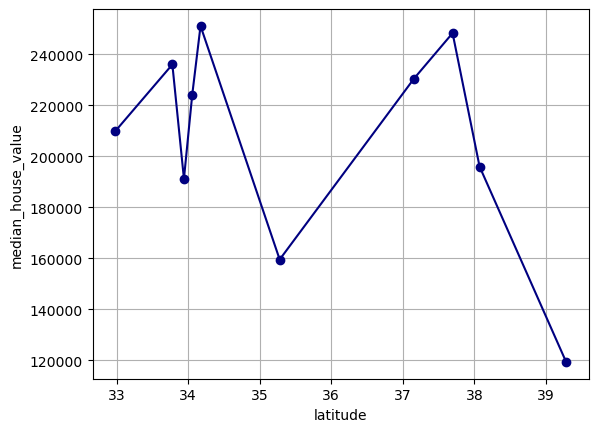

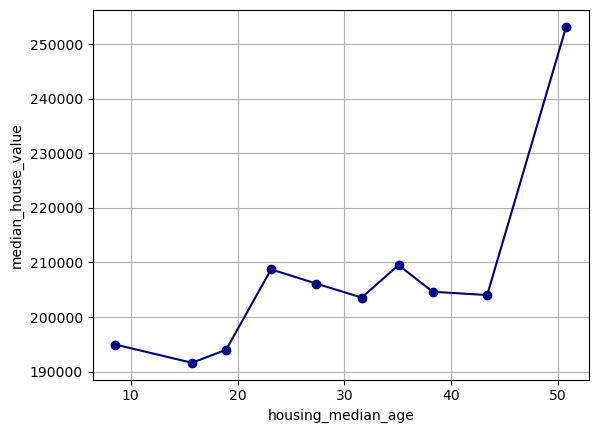

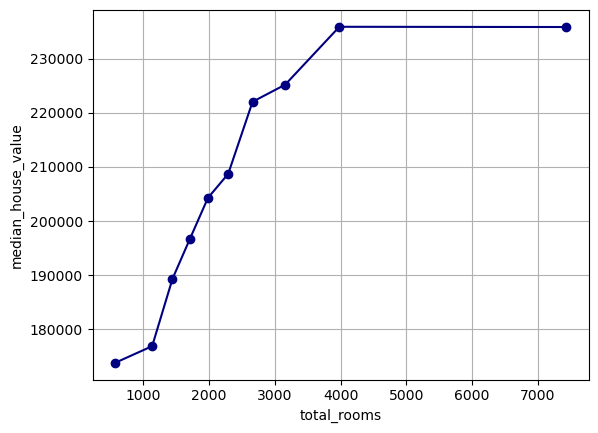

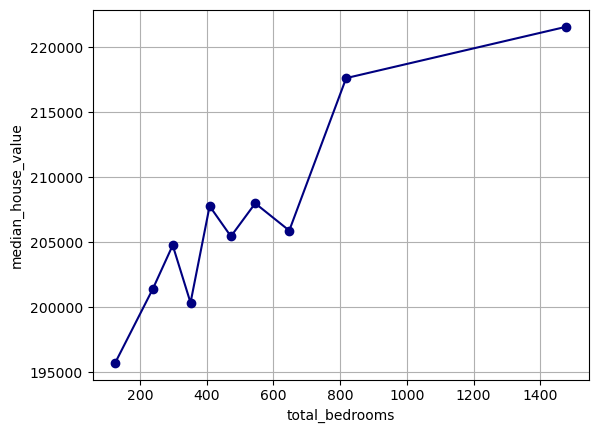

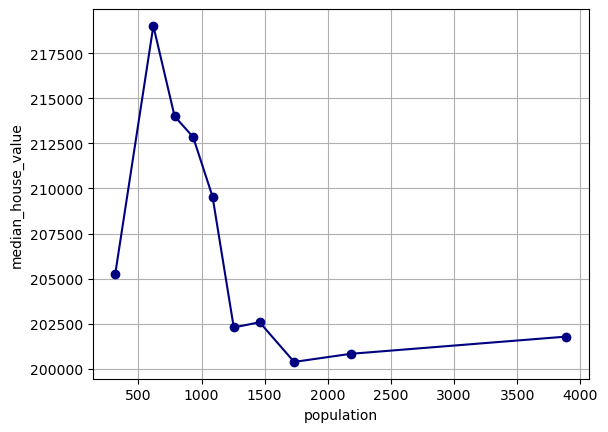

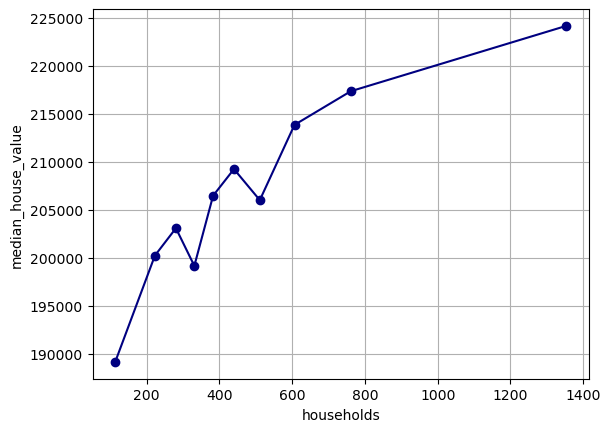

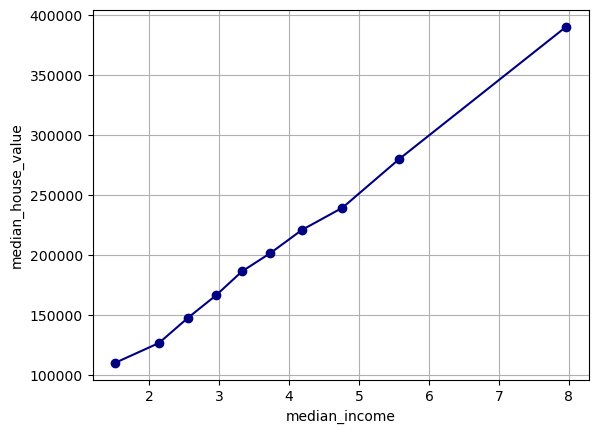

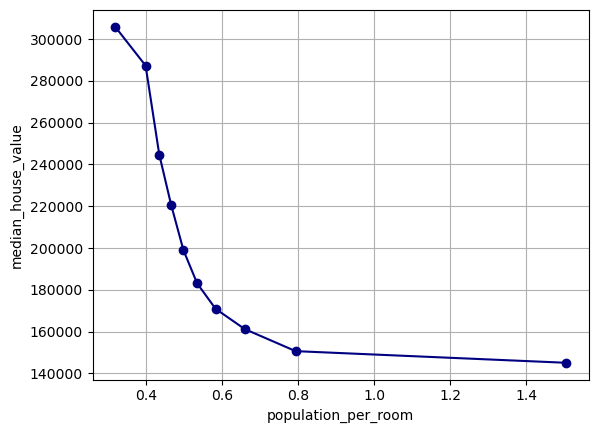

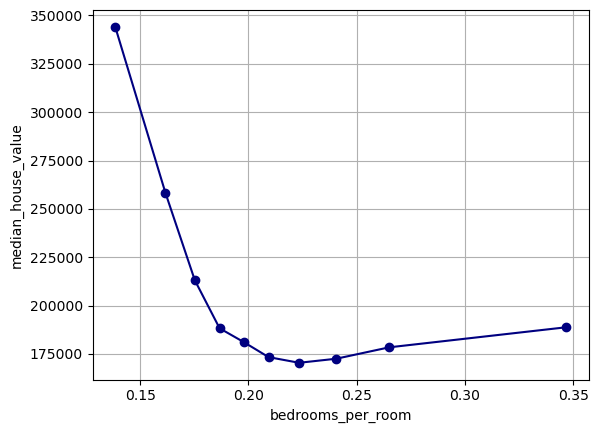

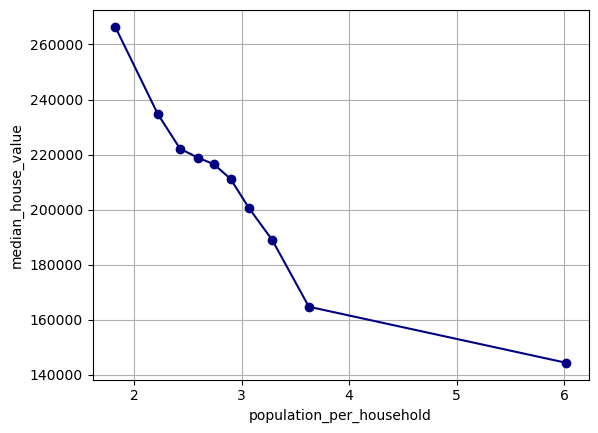

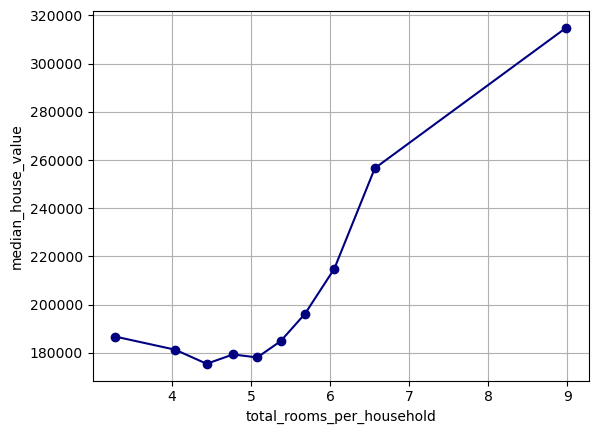

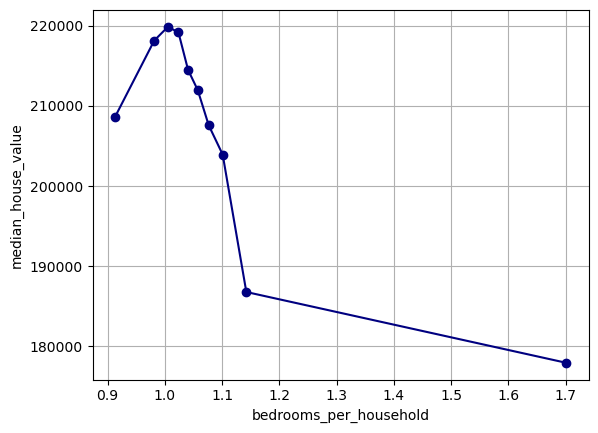

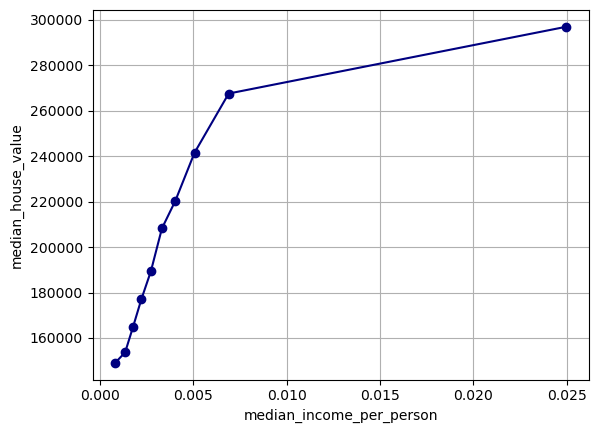

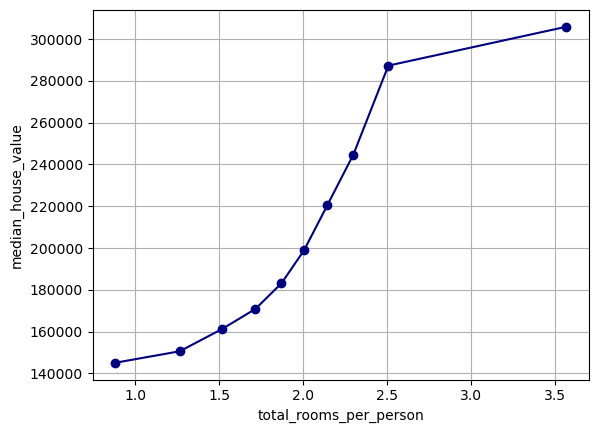

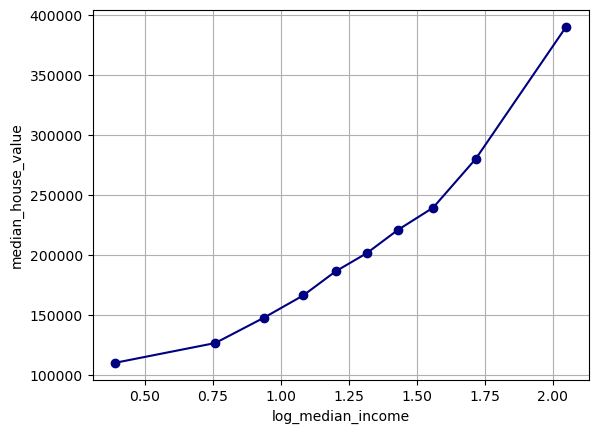

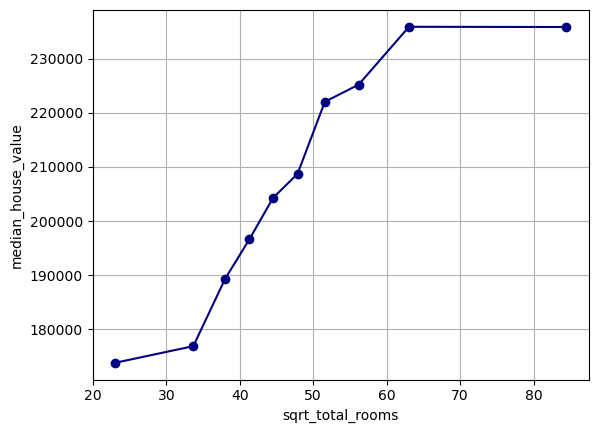

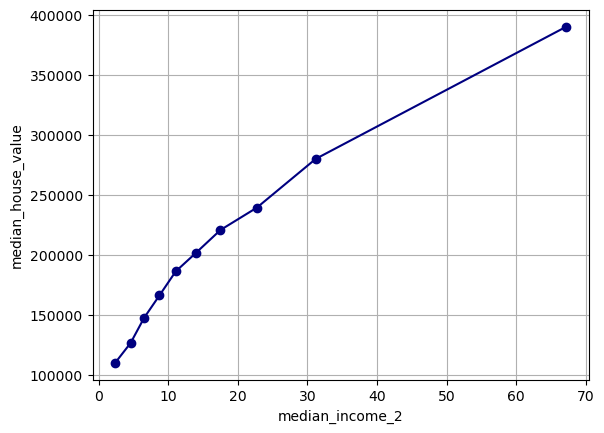

In [15]:
for i in numerical_features:
    if i != 'median_house_value':
        flag_df = df[[target, i]]
        flag_df['bins'] = pd.qcut(flag_df[i], q = 10, labels=False) + 1
        grouped = flag_df.groupby('bins').mean()
        plt.plot(grouped[i], grouped[target], marker='o', color = 'navy')
        plt.xlabel(i)
        plt.ylabel(target)
        plt.grid()
        plt.show()

In [23]:
df.corr()['median_house_value']

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049454
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
population_per_room          -0.033557
bedrooms_per_room            -0.220049
population_per_household     -0.023737
total_rooms_per_household     0.151948
bedrooms_per_household       -0.044265
median_income_per_person      0.114455
total_rooms_per_person        0.209482
log_median_income             0.651807
sqrt_total_rooms              0.161365
median_income_2               0.624514
Name: median_house_value, dtype: float64


### Regresion lineal feature eng

In [25]:
## vuelve a empezar
X = df.copy()
X = X.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.3, random_state=42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal2 = model.predict(X_test)
r2_score(y_pred=predicciones_lineal2, y_true=y_test)

0.6671666919522785

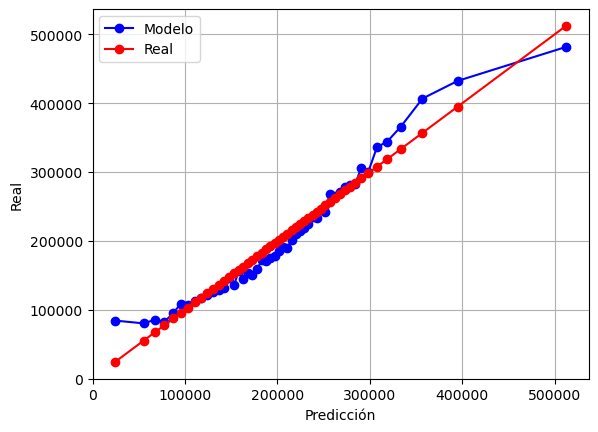

In [21]:
calibracion(predicciones_lineal, y_test, 50)

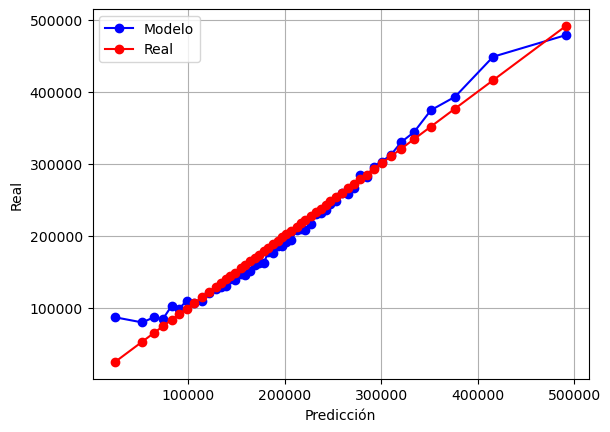

In [22]:
calibracion(predicciones_lineal2, y_test, 50)

### Regresion polinomial grado 2 feature eng 

In [28]:
degree = 2

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_2_fe = model.predict(X_test)
r2_score(y_pred=predicciones_poly_2_fe, y_true=y_test)

-55.97654058021608

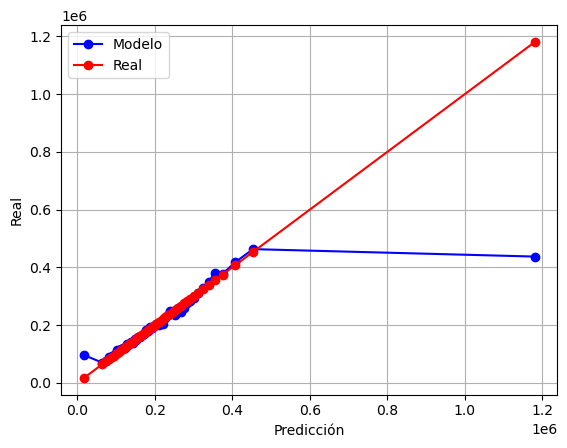

In [29]:
calibracion(predicciones_poly_2_fe, y_test, 50)

### Regresion polinomial grado 3 feature eng 

In [30]:
degree = 3

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_3_fe = model.predict(X_test)
r2_score(y_pred=predicciones_poly_3_fe, y_true=y_test)

-17006.706505126018

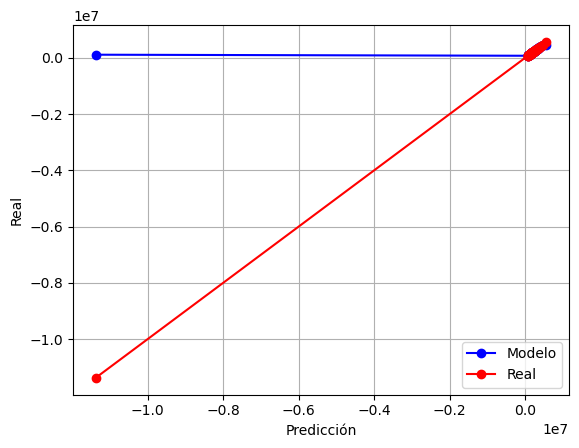

In [31]:
calibracion(predicciones_poly_3_fe, y_test, 50)

### Transformar numericos a categoricos 

In [32]:
# Numericos ni ocean_proximity ni median_house_value
numerical_features = [i for i in df.keys() if 'ocean_proximity' not in i and i != 'median_house_value']
# X = df.copy() y drop target

In [38]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.3, random_state=42)
# Crea funcion bins para las variables numericas 
def create_bins(X, numeric_vars, bins):
    for var in numeric_vars:
        X[f'{var}_bin'] = pd.qcut(X[var], q = bins, labels=False, duplicates='drop') + 1
    return X
# Aplica la foruma de bins a x_trian y x_test
X_train = create_bins(X_train, numerical_features, 25)
X_test = create_bins(X_test, numerical_features, 25)
# Bin features
bins_features = [i for i in X_train.keys() if 'bin' in i]
ocean_features = [i for i in X_train.keys() if 'ocean_proximity' in i]
# Final features 
final_features = bins_features + ocean_features
# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_train = pd.get_dummies(X_train[final_features], columns=bins_features, drop_first=True)
X_test = pd.get_dummies(X_test[final_features], columns=bins_features, drop_first=True)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predicciones_final = model.predict(X_test)
r2_score(y_pred=predicciones_final, y_true=y_test)

0.7437868113580219